In [60]:
#import thinkplot
#import thinkstats2
import pandas as pd
import numpy as np
import math
import scipy.stats as ss
import thinkplot
import thinkstats2

##Seaborn for fancy plots. 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (15,5)

<h1>Assignment 2: Life Expectancy and You!</h1>

<b>Instructions:</b>
<ul>
<li>Use the worksheet below to act as a guide to exploring and examining the data in the dataset.
<li>Try to make things easy to read. Look at the formatting stuff above. 
<li>As long as you do what is asked, you can do things in many different ways. You may need to do a little searching. 
</ul>

### Please Use Formatting to Make it Clear What I Should be Looking at! Please!!! I Beg You!!!

In [61]:
#Load data and do some cleanup before starting
#Please don't change this stuff. 
dfLE = pd.read_csv("led.csv")
dfLE.rename(columns={"Status":"isDeveloped", }, inplace=True)
dfLE["isDeveloped"].replace(('Developed', 'Developing'), (1, 0), inplace=True)
dfLE = dfLE.drop(columns={"Year", "Incomecompositionofresources", "thinness5-9years", "HIV/AIDS", "percentageexpenditure", "Totalexpenditure", "thinness1-19years"})
dfLE = dfLE.groupby("Country", as_index=False).mean()
dfLE.head(100)


,Country,isDeveloped,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Diphtheria,GDP,Population,Schooling
0,Afghanistan,0.0,58.19375,269.0625,78.2500,0.014375,64.562500,2362.2500,15.51875,107.5625,48.3750,52.3125,4.136734e+09,9.972260e+06,8.21250
1,Albania,0.0,75.15625,45.0625,0.6875,4.848750,98.000000,53.3750,49.06875,0.9375,98.1250,98.0625,1.166938e+09,6.969116e+05,12.13750
2,Algeria,0.0,73.61875,108.1875,20.3125,0.406667,78.000000,1943.8750,48.74375,23.5000,91.7500,91.8750,7.345597e+10,2.164983e+07,12.71250
3,Angola,0.0,49.01875,328.5625,83.7500,5.740667,70.222222,3561.3125,18.01875,132.6250,46.1250,47.6875,2.177835e+10,1.014710e+07,8.04375
4,AntiguaandBarbuda,0.0,75.05625,127.5000,0.0000,7.949333,98.266667,0.0000,38.42500,0.0000,96.9375,98.3125,0.000000e+00,NaN,8.84375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Liberia,0.0,57.52500,246.9375,10.6875,3.258000,49.125000,705.3125,19.98750,14.7500,59.4375,40.6875,6.844234e+08,2.788943e+06,9.86875
96,Libya,0.0,72.48750,139.6875,2.1875,0.010000,96.312500,547.3125,54.83750,2.5000,96.5000,96.5000,0.000000e+00,NaN,14.79375
97,Lithuania,1.0,72.80625,117.2500,0.0000,12.632667,94.750000,14.9375,49.23125,0.0000,88.8125,94.2500,1.965220e+10,1.926212e+06,16.10000
98,Luxembourg,1.0,80.78125,67.5625,0.0000,11.922000,92.375000,1.1250,47.82500,0.0000,98.0625,98.9375,1.398673e+10,2.652764e+05,13.63750


<h2>Part 1: Add a column for GDP per Capita (5pts)</h2>

Show print the labels along with just that column. Print 10 random rows of that data. 

Note: you'll have to look at the units to ensure you get it right. 

In [62]:
#Part 1
dfLE['GDPperCapita'] = dfLE['GDP'] / dfLE['Population']
dfLE[['Country','GDPperCapita']].head(10)

,Country,GDPperCapita
0,Afghanistan,414.824126
1,Albania,1674.441147
2,Algeria,3392.912329
3,Angola,2146.263722
4,AntiguaandBarbuda,NaN
5,Argentina,8158.454561
6,Armenia,2857.799550
7,Australia,63337.610450
8,Austria,34897.075919
9,Azerbaijan,3091.580405


### Part 2: Print a visualization of each distribution. Both regular (density) and cumulative. (15pts)

Print each distribution is some type of visualization, also print the cumulative distribution. 
<ul>
<li>5 points are for using some visualization that is effective.
<li>5 points for formatting things in a nice layout. Hint: for whatever chart you use, look into some formatting options. Think of what to try to Google for an example for printing multiple charts, a grid of charts, etc... and try to adapt one to yours. There is also a way to do it using some thinkstats/thinkplot stuff. 
<li><b>5 points are for doing it in an efficient way - just listing off each column is lots of typing... Remember, the #1 trait of programmers is laziness with respect to repetitive tasks. If we are doing the same thing over and over with tiny changes, try to think of a condensed way to do this...</b>
</ul>

GDP
Mean:  45501192005.60506
Standard Deviation:  130561227658.18251


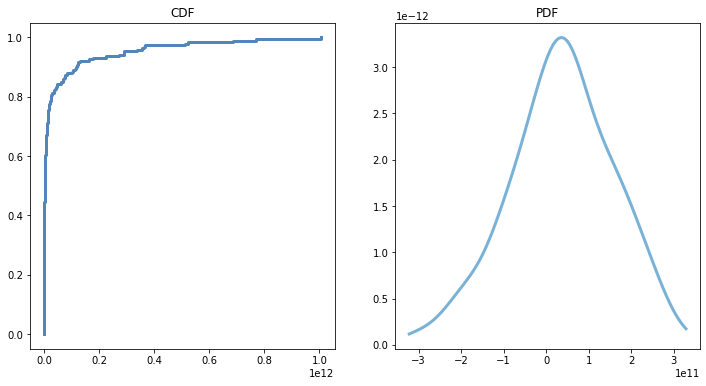

GDPperCapita
Mean:  6886.716335065376
Standard Deviation:  11457.048602171617


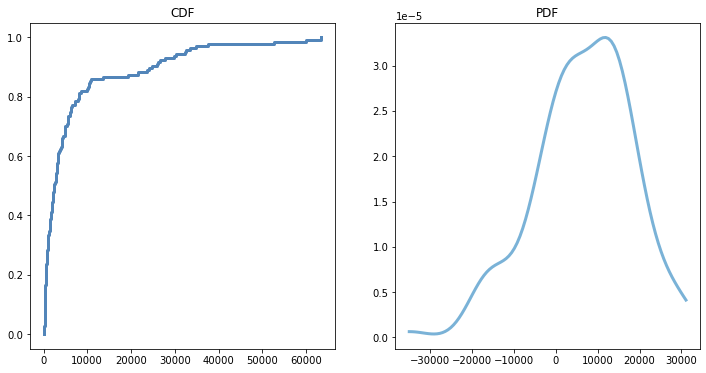

Schooling
Mean:  12.027738764044944
Standard Deviation:  3.104851565570136


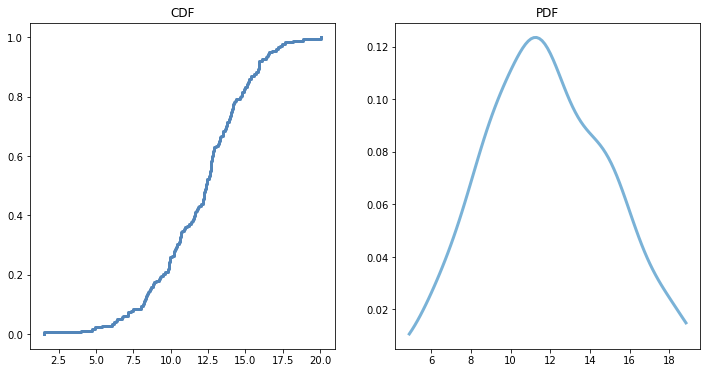

Population
Mean:  12657337.570648147
Standard Deviation:  38279609.48254564


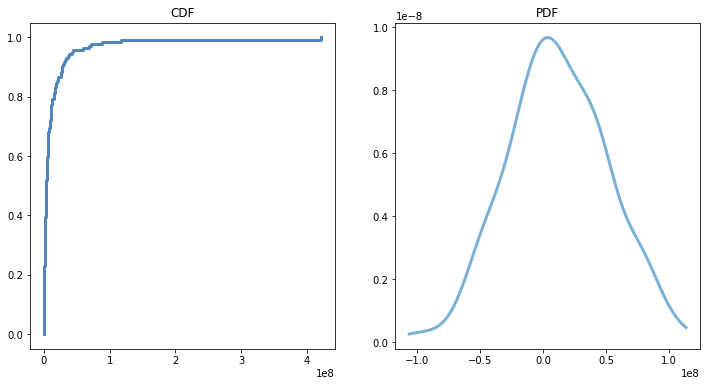

Diphtheria
Mean:  82.6287397157816
Standard Deviation:  16.43326919405052


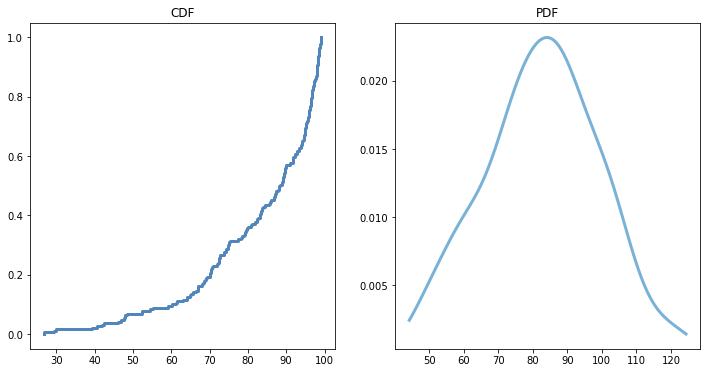

Polio
Mean:  82.83286275243081
Standard Deviation:  15.925330239139988


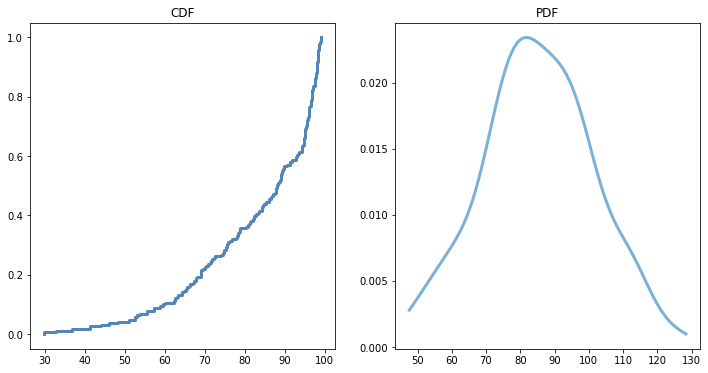

under-fivedeaths
Mean:  40.412630890052355
Standard Deviation:  154.31069269469637


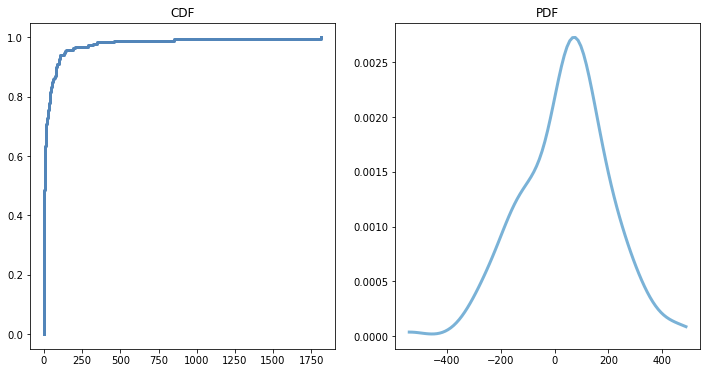

BMI
Mean:  39.117145721925134
Standard Deviation:  17.175529138163274


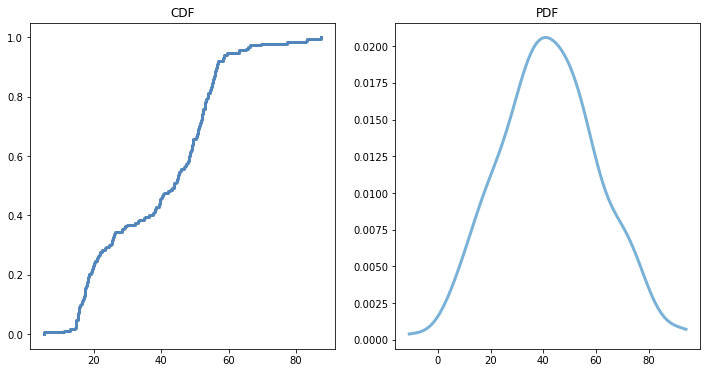

Measles
Mean:  2326.1655759162304
Standard Deviation:  7924.050116227168


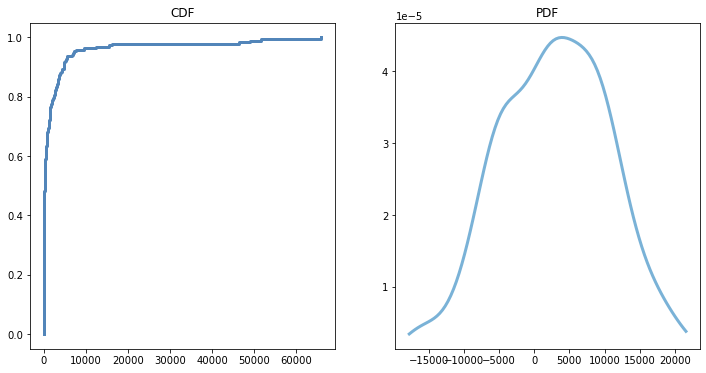

HepatitisB
Mean:  79.28771337026829
Standard Deviation:  17.417696528516913


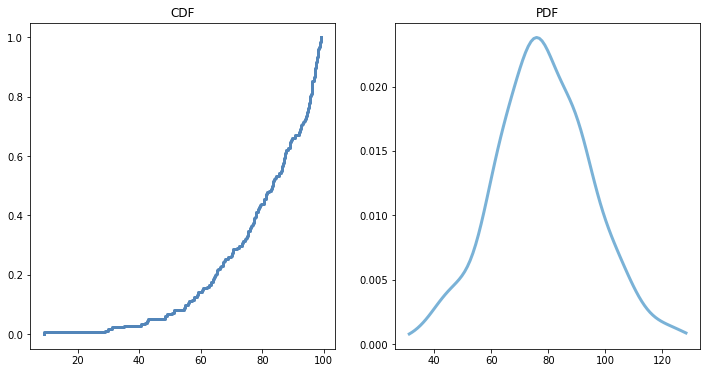

Alcohol
Mean:  4.4867925170067995
Standard Deviation:  3.8731232423949433


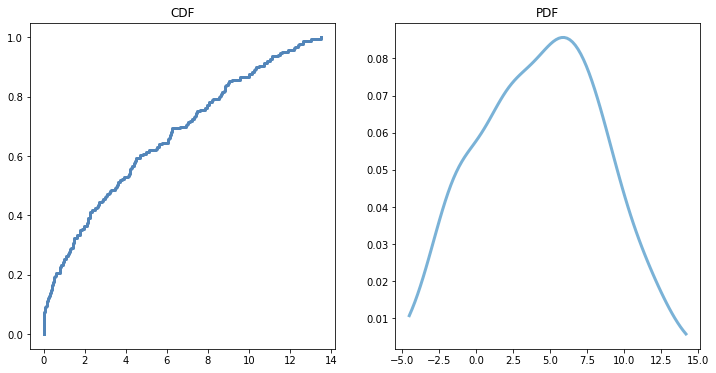

infantdeaths
Mean:  29.13383507853403
Standard Deviation:  113.69160437015927


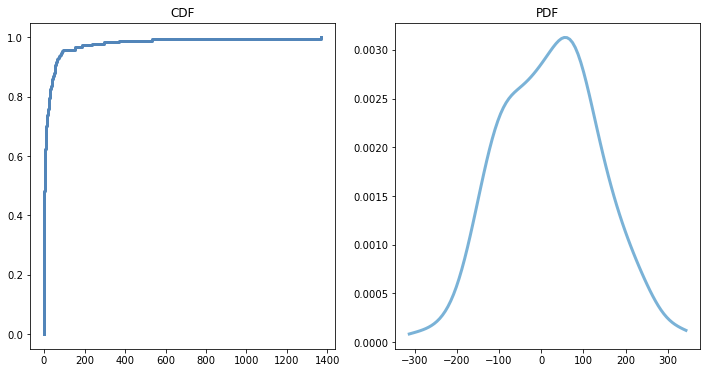

AdultMortality
Mean:  164.79644808743168
Standard Deviation:  96.1851589302683


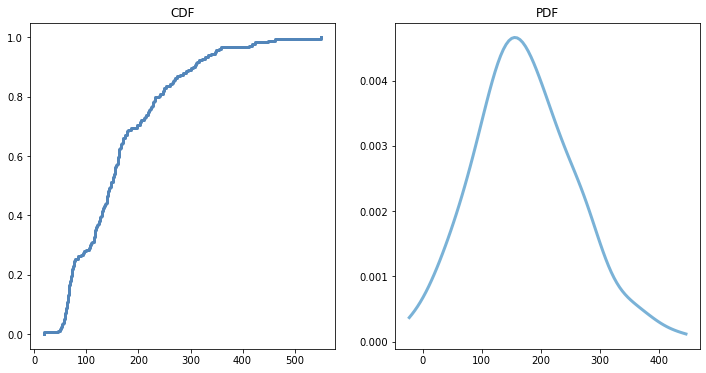

Lifeexpectancy
Mean:  69.22493169398905
Standard Deviation:  9.18643173288443


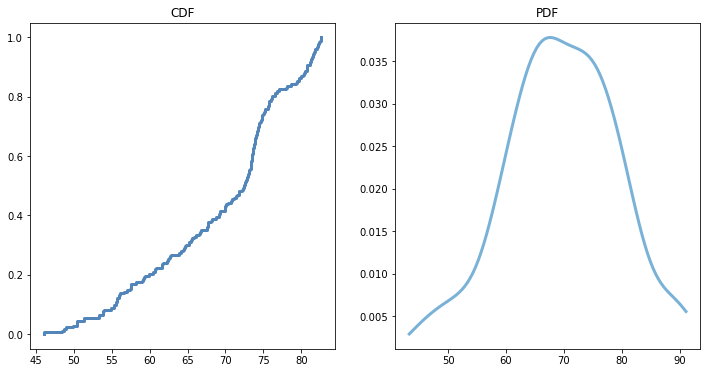

<Figure size 576x432 with 0 Axes>

In [63]:
list = ["GDP","GDPperCapita", "Schooling", "Population", "Diphtheria", "Polio", "under-fivedeaths", "BMI", "Measles", "HepatitisB", "Alcohol", "infantdeaths", "AdultMortality", "Lifeexpectancy"]
i=0
while i < len(list):
    data = pd.Series(dfLE[list[i]])
    mean = data.mean()
    std = data.std()
    val = data.count()
    cdf = thinkstats2.Cdf(data)
    pmf = thinkstats2.Pmf(data)
    sample = np.random.normal(mean, std, val)
    pdf = thinkstats2.EstimatedPdf(sample)

    thinkplot.PrePlot(2, 1, 2)
    thinkplot.SubPlot(1, title="CDF")
    thinkplot.Cdf(cdf)
    thinkplot.SubPlot(2, title="PDF")
    thinkplot.Pdf(pdf)
    thinkplot.Config()
    print(list[i])
    print("Mean: ", mean)
    print("Standard Deviation: ", std)
    thinkplot.Show()
    i = i + 1

### Create an analytical distribution for SCHOOLING, and use it for a couple of things. (20pts)

<ul>
<li>5 points are for choosing an appropriate distribution. Please state it clearly somewhere.
<li>10 points are for creating and visualizing the distribution. Do it <b>without</b> using a fit() method. Plot the emperical data on the same graph as the analytical distribution. 
<li>5 points are for using the distribution to predict the percentage of that have a schooling level within 1 year of Canada. 
</ul>

The appropriate distribution choosen is a Probability Plot.

Mean:  12.027738764044944
Standard Deviation::  3.104851565570136
Percentage of that have schooling level within 1 year of Canada 0.16225975758533628


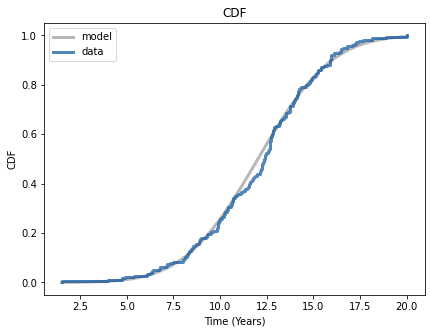

In [64]:
#Analytical for Schooling

school = dfLE["Schooling"]
canada = dfLE[dfLE["Country"] == "Canada"]
mu = school.mean()
sigma = school.std()
schoolN = ss.norm(mu,sigma)

cdf = thinkstats2.Cdf(school)

xs, ps = thinkstats2.RenderNormalCdf(mu, sigma, low=1.5, high=20)

thinkplot.PrePlot(1)
thinkplot.SubPlot(1, title="CDF")
thinkplot.Plot(xs, ps, label='model', color='0.6')
thinkplot.Cdf(cdf, label="data") 
thinkplot.Config(xlabel='Time (Years)', ylabel='CDF')


print("Mean: ", mu)
print("Standard Deviation:: ", sigma)
# Canada's schooling is 15.875. So within 1 year of it 16 and 14.
print("Percentage of that have schooling level within 1 year of Canada",schoolN.cdf(16) - schoolN.cdf(14))




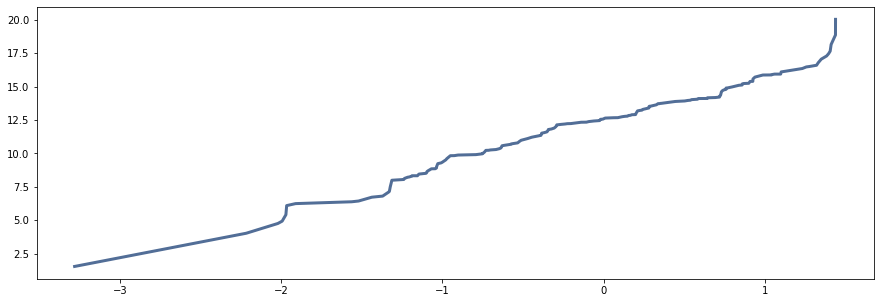

In [65]:
# Unable to see the gray line, so used CDF to plot instead
tmp = np.array(dfLE["Schooling"])
thinkstats2.NormalProbabilityPlot(tmp)

### Part 3: Create another analytical distribution for GDP per Capita (20pts)

<ul>
<li>5 points are for choosing an appropriate distribution. Please state it clearly somewhere.
<li>10 points are for creating and visualizing it alongside the emperical. You have free reign on how. 
<li>5 points are for using the analytical distribution to evaluate the quality of your GDP per capita metric - does it appear accurate? Why or why not?
<li>If you've judged GDP per cap to be unreliable, drop it. 
</ul>

The appropriate distribution choosen is a Probability Plot.

Mean:  6886.716335065376
Standard Deviation::  11457.048602171617


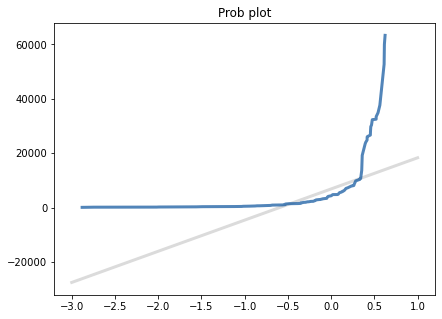

In [66]:
#Analytical for GDP/capita
gdppc = dfLE['GDPperCapita']

mu = gdppc.mean()
sigma = gdppc.std()

thinkplot.PrePlot(1)
thinkplot.SubPlot(1, title="Prob plot")
xs = [-3, 1]
xs, ys = thinkstats2.FitLine(xs, mu, sigma)
thinkplot.Plot(xs, ys, color='0.8', label='model')
thinkstats2.NormalProbabilityPlot(gdppc)
print("Mean: ", mu)
print("Standard Deviation:: ", sigma)

The GDP per Capita doesn't appear accurate as the the blue line is not overlapping the grey line which indicates that the real data doesn't match. In this case, we will this column is unreliable and we will drop it.

### Part 4: Visually identify correlations. Separate developed and not developed countries is some way. (15pts)

<ul>
<li>5 points are for effectively and clearly showing the visualizations used to evaluate correlations.
<li>10 points are for, in the process of visualizing, remove outliers that confound correlations. List outlier "filters" you used and justify why - was the data an error, a real value that is just way out of line, or somethingn else? Remember, you're trying to find things that have correlations with each other. Looking at a correlation between home size and income may not benefit from Jeff Bezos being included. It may be helpful to look at the results and revise. 
</ul>

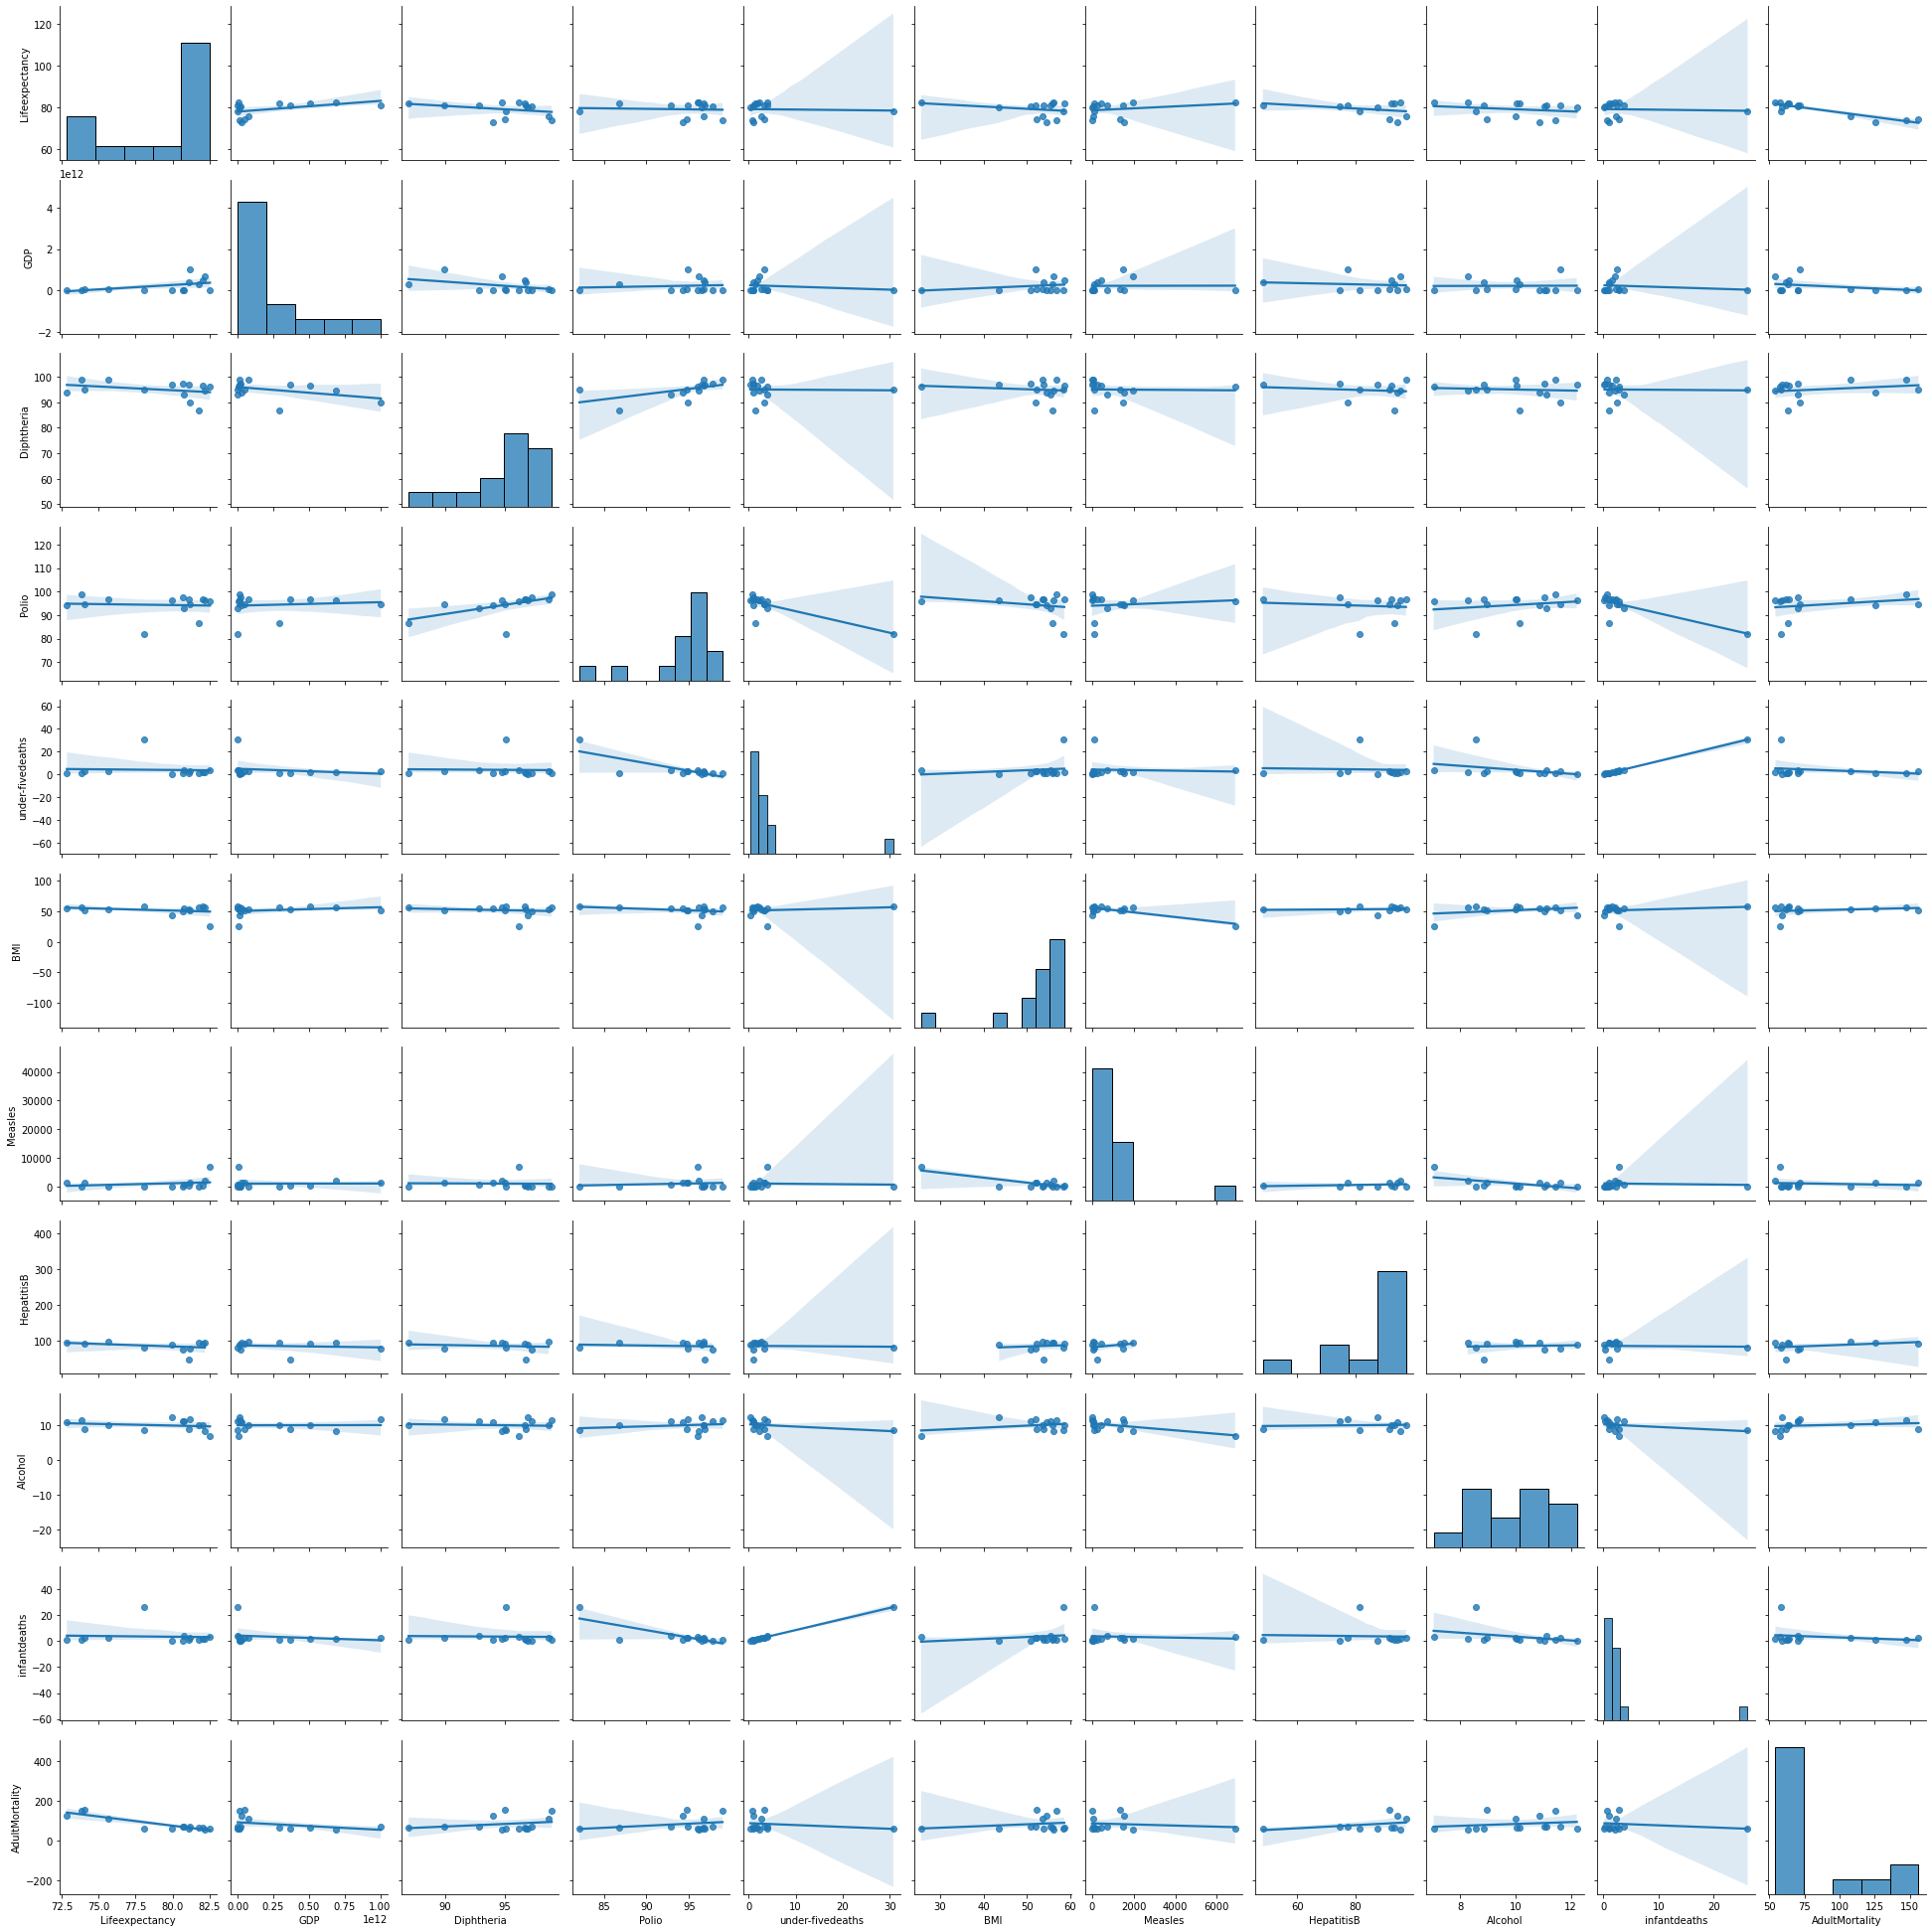

In [154]:
#Visualize correlations. 

#Developed countries

#Filter outliers
dfLE1 = dfLE[["Lifeexpectancy", "GDP", "Diphtheria", "Polio", "under-fivedeaths", "BMI", "Measles", "HepatitisB", "Alcohol", "infantdeaths", "AdultMortality", "isDeveloped"]]
dfLE1 = dfLE1[dfLE1["isDeveloped"] == 1]

dfLE1 = dfLE1[dfLE1["infantdeaths"] > 0]
dfLE1 = dfLE1[dfLE1["infantdeaths"] < 750]
dfLE1 = dfLE1[dfLE1["under-fivedeaths"] > 0]
dfLE1 = dfLE1[dfLE1["under-fivedeaths"] < 500]

sns.pairplot(dfLE1.drop(columns=["isDeveloped"]), dropna=True, kind="reg")
plt.show()



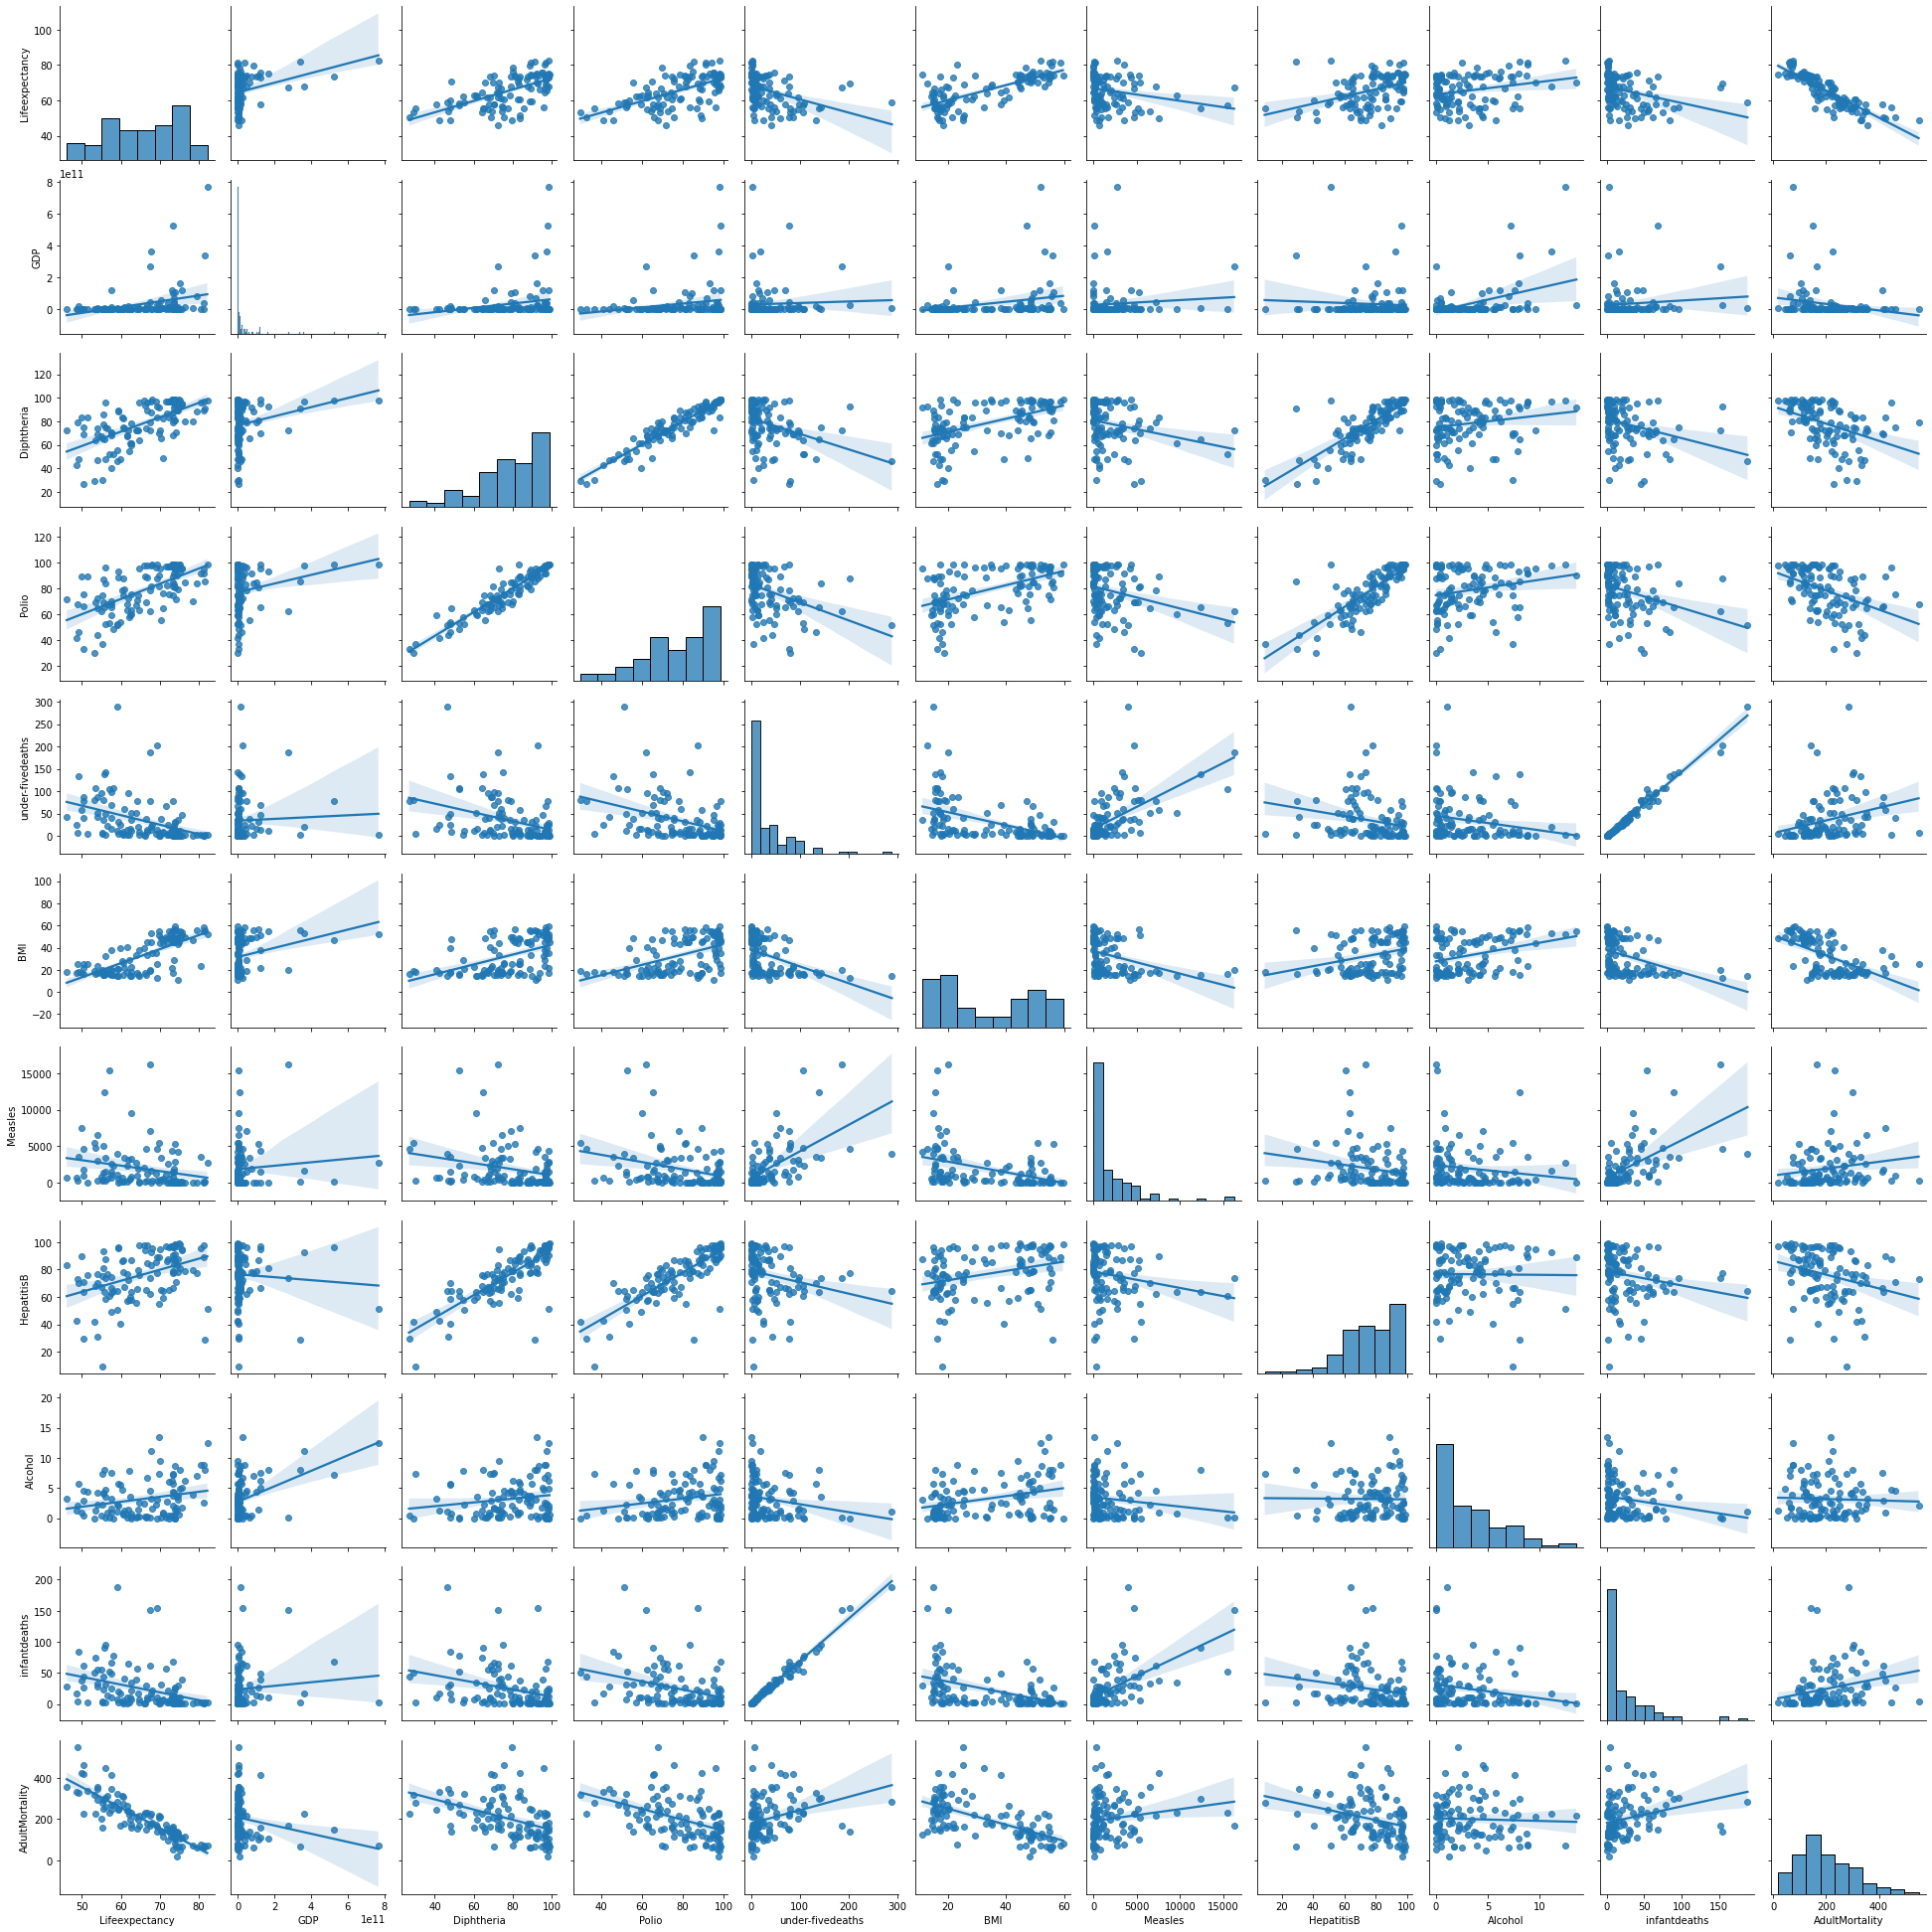

In [158]:

#Not developed countries
dfLE2 = dfLE[["Lifeexpectancy", "GDP", "Diphtheria", "Polio", "under-fivedeaths", "BMI", "Measles", "HepatitisB", "Alcohol", "infantdeaths", "AdultMortality", "isDeveloped"]]
dfLE2 = dfLE2[dfLE2["isDeveloped"] == 0]

#Filter outliers
dfLE2 = dfLE2[dfLE2["infantdeaths"] > 0]
dfLE2 = dfLE2[dfLE2["infantdeaths"] < 200]
dfLE2 = dfLE2[dfLE2["under-fivedeaths"] > 0]
dfLE2 = dfLE2[dfLE2["under-fivedeaths"] < 400]
dfLE2 = dfLE2[dfLE2["Measles"] > 0]
dfLE2 = dfLE2[dfLE2["Measles"] < 40000]

sns.pairplot(dfLE2.drop(columns=["isDeveloped"]), kind="reg")
plt.show()



The filters I used for outliers were way out line compared to the real value.

### Part 5: Calculate correlations (25pts)

<ul>
<li>5 points are for identifying and calculating 3 strongest correlations with life expectancy for each of developed and not developed. 
<li>10 points are for analyzing those correlations. Do they appear to be supported by reality? Do you have reason to beleive any are causal?
<li>10 points are for identifying 2 places where developing and developed countries have a substantially different relationship with respect to life expectancy, and theorizing why. What would be needed to confirm your thoughts?
</ul>

<b>Please put your written parts in markdown cells, with a little formatting to make them readable. 

In [165]:
#Calculate correlations and analyze. 
#Developed
print("Life expectancy-GDP:", thinkstats2.Corr(dfLE1["Lifeexpectancy"], dfLE1["GDP"]), thinkstats2.SpearmanCorr(dfLE1["Lifeexpectancy"], dfLE1["GDP"]))
print("Life expectancy-measals:", thinkstats2.Corr(dfLE1["Lifeexpectancy"], dfLE1["Measles"]), thinkstats2.SpearmanCorr(dfLE1["Lifeexpectancy"], dfLE1["Measles"]))
print("Life expectancy-under five deaths:", thinkstats2.Corr(dfLE1["Lifeexpectancy"], dfLE1["under-fivedeaths"]), thinkstats2.SpearmanCorr(dfLE1["Lifeexpectancy"], dfLE1["under-fivedeaths"]))

Life expectancy-GDP: 0.46778053118801827 0.3476349738376406
Life expectancy-measals: 0.2467022454953112 0.43736263736263736
Life expectancy-under five deaths: -0.05212364270519453 0.26077746069183966


In [160]:
#Developing
print("Life expectancy-GDP:", thinkstats2.Corr(dfLE2["Lifeexpectancy"], dfLE2["GDP"]), thinkstats2.SpearmanCorr(dfLE2["Lifeexpectancy"], dfLE2["GDP"]))
print("Life expectancy-polio:", thinkstats2.Corr(dfLE2["Lifeexpectancy"], dfLE2["Polio"]), thinkstats2.SpearmanCorr(dfLE2["Lifeexpectancy"], dfLE2["Polio"]))
print("Life expectancy-diphtheria:", thinkstats2.Corr(dfLE2["Lifeexpectancy"], dfLE2["Diphtheria"]), thinkstats2.SpearmanCorr(dfLE2["Lifeexpectancy"], dfLE2["Diphtheria"]))

Life expectancy-GDP: 0.3138992220226291 0.22723266490651342
Life expectancy-polio: 0.6212742061797958 0.616691012146732
Life expectancy-diphtheria: 0.6266121279313963 0.6380315408957838


The correlations support the data between developed and developing countries. Developing countries correlations are causal as these diseases directly affect their life expectancy.

The difference for developed and developing with respect to life expectancy is that developed countries have better living conditions such as healthcare, food, cleanliness, better housing.Developing countries struggle where there is worse living conditions such as no full health care, poverty, cleanliness, lack of shelter which caused to a lack of income in the country to give citiziens benefits or enough money to take care of neccesities. For example, developing countries has more people with polio and diphtheria due to these living conditions compared to developed countries.